In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import calendar as cal


In [2]:
pip install warning

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warning (from versions: none)
ERROR: No matching distribution found for warning

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Data Sourcing

In [3]:
df = pd.read_csv('Uber Request Data.csv')

In [4]:
df.describe()
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#replacing column name with '_'#
df.columns = df.columns.str.replace(' ','_')

In [6]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [7]:
#checking for duplicate rows
df.duplicated (subset='Request_id').sum()

0

In [8]:
#checing for any spelling mistake in pickup_point
df['Pickup_point'].unique()

array(['Airport', 'City'], dtype=object)

In [9]:
df['Status'].unique()#spelling check in status col

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [10]:
df.isnull().sum()#its look like driver_id and drop_timestamp have null values

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

## Data prepartion 

In [11]:
df['request_date_time'] = pd.to_datetime(df['Request_timestamp'],dayfirst=True)
df['drop_date_time']= pd.to_datetime(df['Drop_timestamp'],dayfirst=True)
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_date_time,drop_date_time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


In [12]:
#checking if datetime cols are converted to daytime or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request_timestamp  6745 non-null   object        
 5   Drop_timestamp     2831 non-null   object        
 6   request_date_time  6745 non-null   datetime64[ns]
 7   drop_date_time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.7+ KB


In [13]:
#no need of request_timestamp and drop_timestamp so droping them 
df = df.drop('Request_timestamp',axis=1)
df = df.drop('Drop_timestamp',axis=1)
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_date_time,drop_date_time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [14]:
print(df.shape)
print(df.info())

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Driver_id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   request_date_time  6745 non-null   datetime64[ns]
 5   drop_date_time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB
None


In [15]:
df['request_date_time'].isna().sum()#checking nan value in request_date_time col

0

In [16]:
#exracting date and time from requestime col 
df['request_date'] = df['request_date_time'].dt.date
df['request_time'] = df['drop_date_time'].dt.time
df.sample(5)

,Request_id,Pickup_point,Driver_id,Status,request_date_time,drop_date_time,request_date,request_time
6145,5333,Airport,NaN,No Cars Available,2016-07-14 22:22:35,NaT,2016-07-14,NaT
4709,1792,City,NaN,No Cars Available,2016-07-12 09:10:00,NaT,2016-07-12,NaT
3092,2931,City,66.0,Cancelled,2016-07-13 06:31:03,NaT,2016-07-13,NaT
5571,3961,City,NaN,No Cars Available,2016-07-13 22:50:57,NaT,2016-07-13,NaT
6375,6075,City,NaN,No Cars Available,2016-07-15 14:10:43,NaT,2016-07-15,NaT


In [17]:
# df['request_dayofweek'
# ].fillna("NaT",inplace = True)

In [18]:
#extraction day_of_week from request_date
df['request_dayofweek'] = df['request_date_time'].dt.day_name()
                                    

In [19]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_date_time,drop_date_time,request_date,request_time,request_dayofweek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,13:00:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,18:47:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:58:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,22:03:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,09:25:47,Wednesday


In [20]:
df['request_time'
].fillna("NaT",inplace = True)

In [21]:
df['request_time'].isna().sum()

0

In [22]:
#extracting hours from drop_date_time
df['request_hours'] = df['request_date_time'].dt.hour

In [23]:
df.head()
df.isna().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
request_date_time       0
drop_date_time       3914
request_date            0
request_time            0
request_dayofweek       0
request_hours           0
dtype: int64

In [24]:
#creating slot of request_hour
df.loc[df['request_hours'].between(0,3,inclusive = True),'request_timeslot'] = 'Late Night'
df.loc[df['request_hours'].between(4,6,inclusive= True),'request_timeslot'] = 'Early Morning'
df.loc[df['request_hours'].between(7,12,inclusive= True),'request_timeslot'] = 'Morning'
df.loc[df['request_hours'].between(13,17,inclusive= True),'request_timeslot'] = 'Afertnoon'
df.loc[df['request_hours'].between(18,20,inclusive= True),'request_timeslot'] = 'Evening'
df.loc[df['request_hours'].between(21,24,inclusive= True),'request_timeslot'] = 'Night'

In [25]:
# data perpartion extracting date and time from drop_date_time
df['drop_date'] = df['drop_date_time'].dt.date
df['drop_time'] =  df['drop_date_time'].dt.time

In [26]:
df.sample(5)

,Request_id,Pickup_point,Driver_id,Status,request_date_time,drop_date_time,request_date,request_time,request_dayofweek,request_hours,request_timeslot,drop_date,drop_time
5181,2892,City,NaN,No Cars Available,2016-07-13 05:55:54,NaT,2016-07-13,NaT,Wednesday,5,Early Morning,NaT,NaT
1153,1184,City,120.0,Trip Completed,2016-07-11 21:01:00,2016-07-11 22:11:00,2016-07-11,22:11:00,Monday,21,Night,2016-07-11,22:11:00
381,5757,City,38.0,Trip Completed,2016-07-15 08:12:21,2016-07-15 09:17:55,2016-07-15,09:17:55,Friday,8,Morning,2016-07-15,09:17:55
3326,3849,City,121.0,Cancelled,2016-07-13 21:36:47,NaT,2016-07-13,NaT,Wednesday,21,Night,NaT,NaT
3167,6209,Airport,83.0,Cancelled,2016-07-15 17:32:54,NaT,2016-07-15,NaT,Friday,17,Afertnoon,NaT,NaT


## Data Analysis

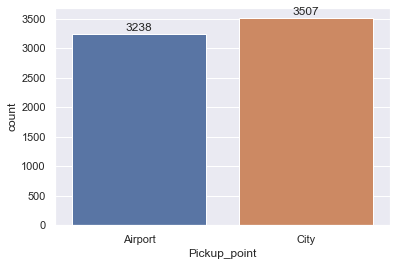

In [27]:
# getting insight from pickup_point
sns.set(style = 'darkgrid')
ax = sns.countplot(x = "Pickup_point",data = df)
for p in ax.patches:
    value = p.get_height()
    x  = p.get_x()+ p.get_width()/2
    y = p.get_height()+50
    ax.text(x,y,value,ha="center")
plt.show()

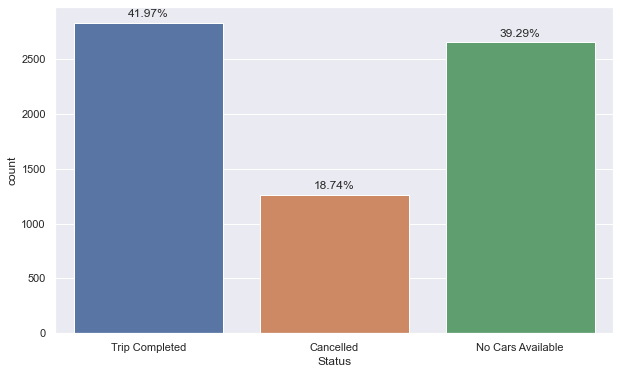

In [28]:
plt.figure(figsize =(10,6))
ax = sns.countplot(x = "Status",data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    x = p.get_x()+0.4
    y = p.get_height()+50
    ax.text(x,y,'{:}%'.format(value),ha="center")
plt.show()

# #looking for insight in status
# plt.figure(figsize=(10, 8))
# ax =sns.countplot(x="Status", data=df)
# total = len(df)
# for p in ax.patches:
#     value = round((p.get_height()/total)*100,2)
#     X = p.get_x()+0.4
#     Y = p.get_height()+50
#     ax.text(X, Y,'{:} %'.format(value), ha="center")
# plt.show()



In [29]:
#looking to find request count and days_of_week

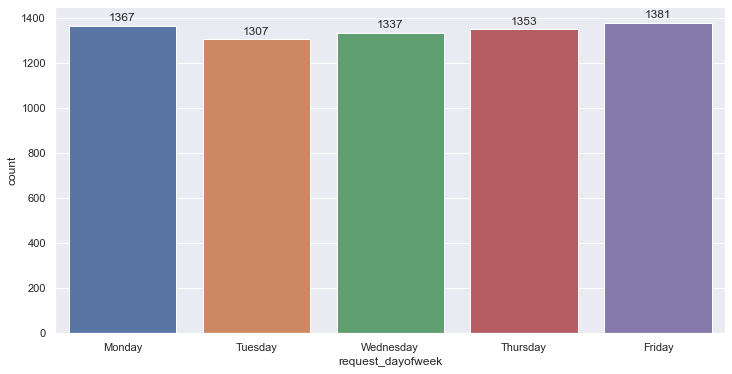

In [30]:
plt.figure(num =None,figsize=(12,6),facecolor='w',edgecolor = 'k')
ax = sns.countplot(x='request_dayofweek',data = df)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X,Y,value,ha = "center")
plt.show()




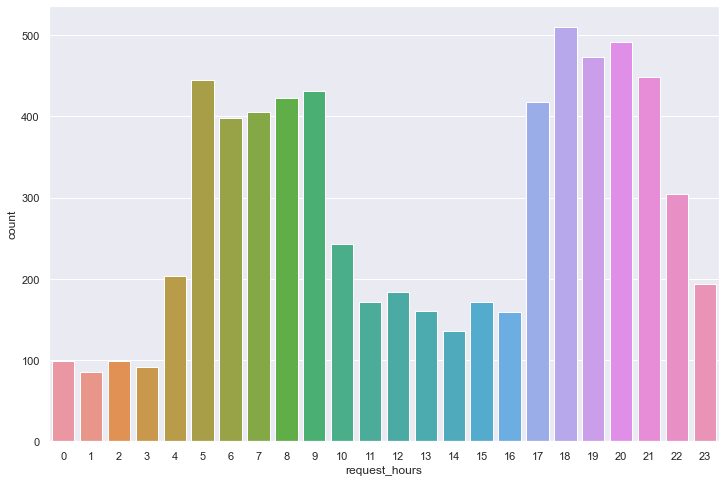

In [31]:
plt.figure(figsize =(12,8),num=None,facecolor='w',edgecolor='k')
sns.countplot(x ='request_hours',data = df)
plt.show()

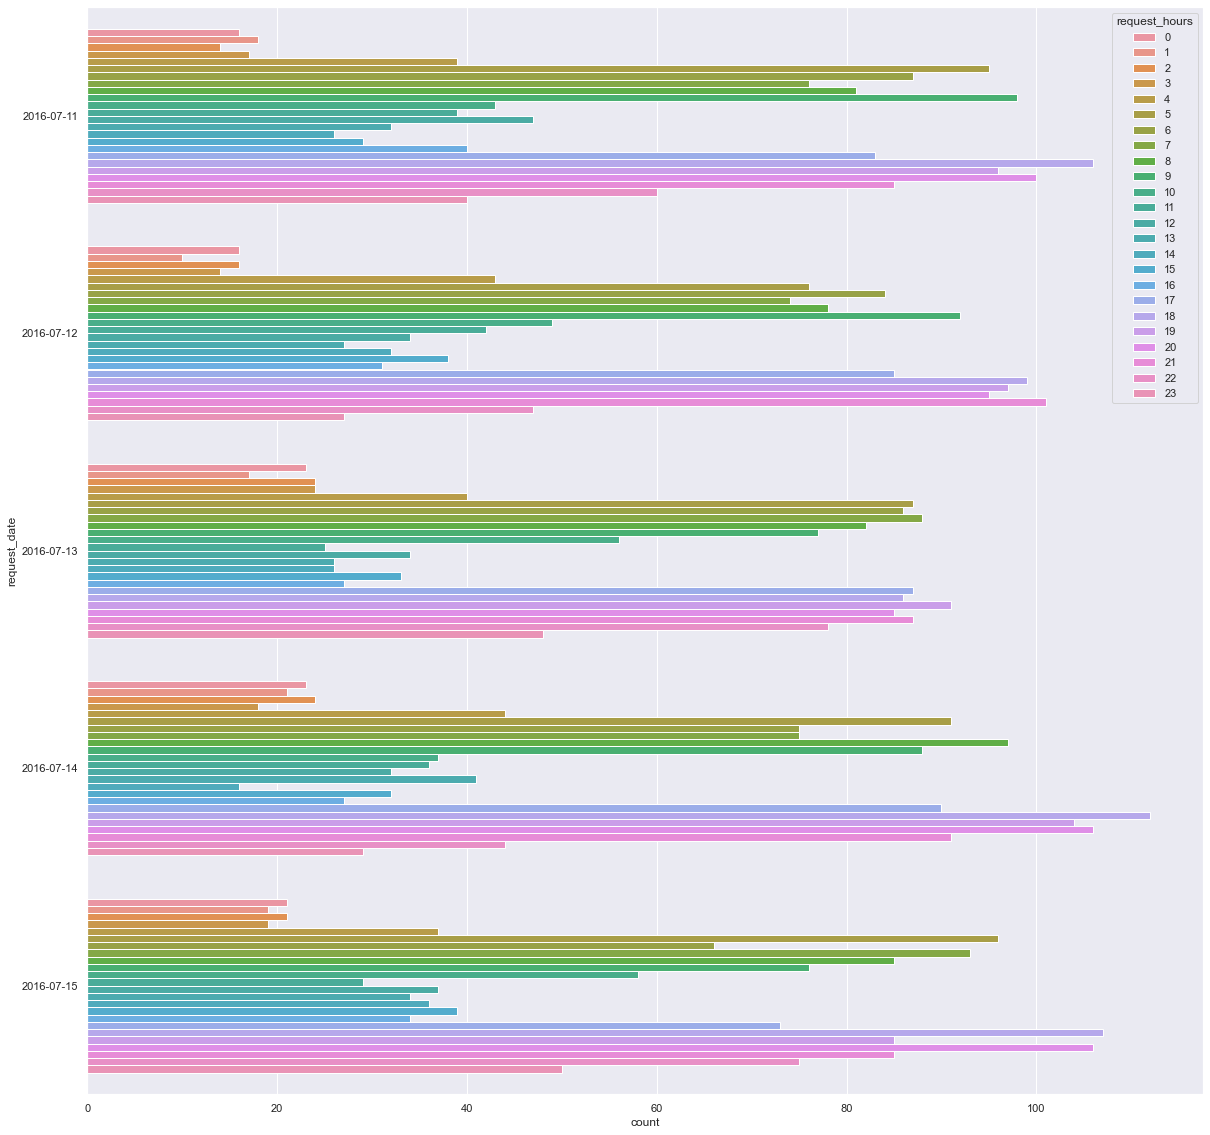

In [32]:
#checking high rates from 5am to 9am and 5pm to 9pm is consistent
plt.figure(figsize=(20,20),facecolor='w',edgecolor='b')
sns.countplot(y='request_date',hue='request_hours',data= df)
plt.show()

In [33]:
#show all data have high request is around same time

In [34]:
#looking insight in requesttime-slot

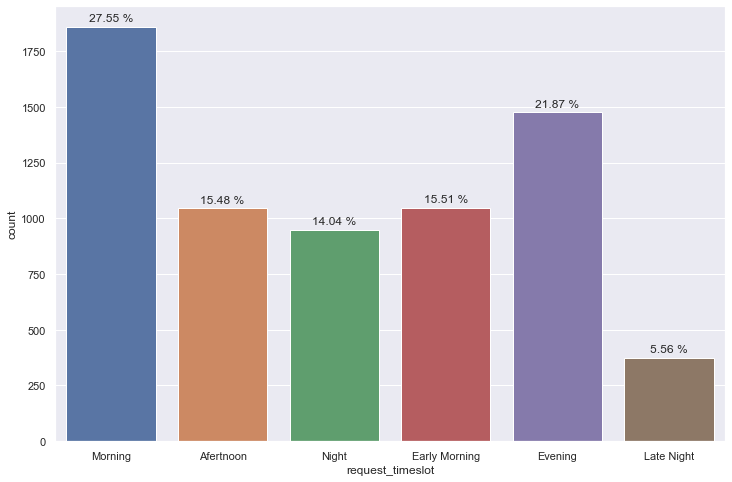

In [35]:
plt.figure(num = None,figsize=(12,8),facecolor ='w',edgecolor='k')
ax = sns.countplot(x='request_timeslot',data=df)
total = len(df)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X =p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X,Y,'{:} %'.format(value),ha='center')
plt.show()

observation so far:
1.Only 41.97% request is completed from airport and city 
2.High request rate are in morning and evening

In [36]:
#segmentation pickup point over status

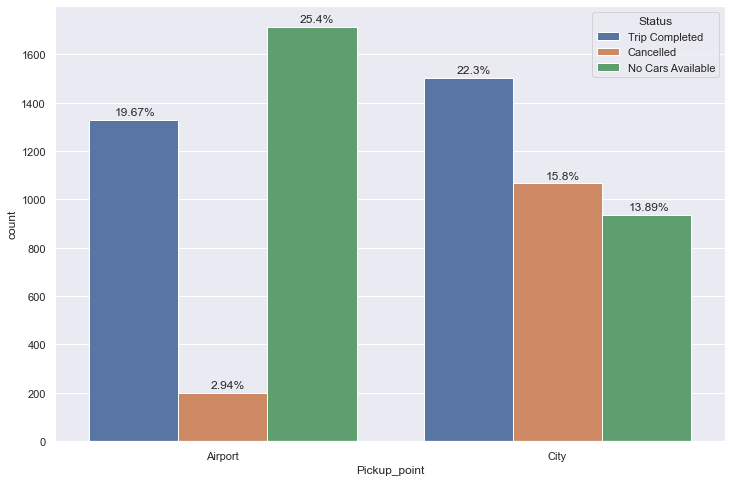

In [37]:
plt.figure(figsize=(12,8),facecolor = 'w',edgecolor='k')
ax = sns.countplot(x='Pickup_point',hue='Status',data=df)
total = len(df)
for p in ax.patches:
    value = round(p.get_height()/total*100,2)
    X = p.get_x()+0.2
    Y= p.get_height()+20
    ax.text(X,Y,'{:}%'.format(value),ha='right')
plt.show()

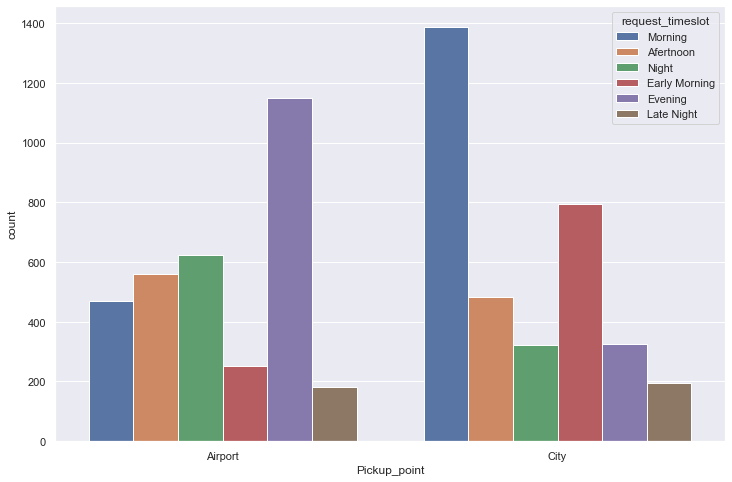

In [38]:
#segmentation pickup point over timeslot
plt.figure(figsize=(12,8),facecolor='w',edgecolor='k')
sns.countplot(x = 'Pickup_point',hue ='request_timeslot',data=df)
plt.show()

airporty - has the highest request in the eveningcity - has the highest request in the morning
From this graph our previous observation of high request rates of morning and evening slot gets clarified.

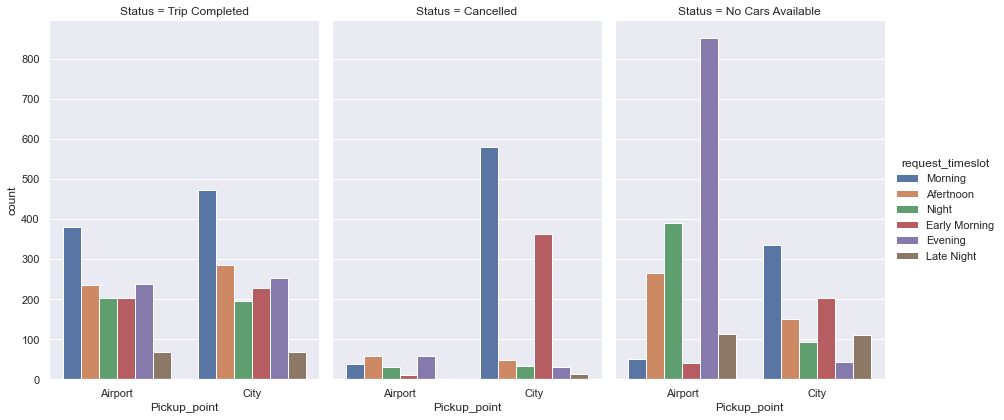

In [52]:
# segmentation the timeslot vs both status and pickup point
sns.catplot(x='Pickup_point',col ='Status',hue= 'request_timeslot',data = df,kind='count',height=6,aspect=0.7,ci=85,col_wrap=3,margin_titles=True)
plt.show()

In [40]:
#From the above plot it is evident that:
#airport requests during the evening slot(during which there is high airport request rate)there are no cars available
#Most city requests get cancelled in the morning slot(during which there is high city request rate)

Observation so far:
The problematic status are cancelled and no cars available as it leads to potential loss of revenue.

Airport pickup point has most 'no car available'
City pickup point has highest 'Cancelled' status
'Airport' - has the hightest request in the 'evening' aligning to our 'no car available' status
'City'- has the hightest request in the 'morning' aligning to our 'Cancelled' status

supply and demand gap calculation

In [67]:
#creating demand column
df.loc[(df.Status== 'Trip Completed')|(df.Status == 'Cancelled')|(df.Status=='No Cars Availabel'),'demand']='demand'


In [72]:
#creating supply column 
df.loc[(df.Status == 'Trip Completed'),'Supply']='Supply'

In [74]:
#creating gap column
df.loc[(df.Status == 'Cancelled')|(df.Status=='No Cars Availabel'),'gap'] ='Gap'

In [75]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,request_date_time,drop_date_time,request_date,request_time,request_dayofweek,request_hours,request_timeslot,drop_date,drop_time,demand,Supply,gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,13:00:00,Monday,11,Morning,2016-07-11,13:00:00,demand,Supply,demand
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,18:47:00,Monday,17,Afertnoon,2016-07-11,18:47:00,demand,Supply,demand
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:58:00,Tuesday,9,Morning,2016-07-12,09:58:00,demand,Supply,demand
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,22:03:00,Tuesday,21,Night,2016-07-12,22:03:00,demand,Supply,demand
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,09:25:47,Wednesday,8,Morning,2016-07-13,09:25:47,demand,Supply,demand


In [76]:
#calculating demand supply and gap count
df['demand'].count()

6745

In [77]:
df['Supply'].count()

2831

In [80]:
df['gap'].count()

6745

In [87]:
uber_SupplyandDemand = pd.DataFrame([df.demand,df.Supply,df.gap]).transpose()
uber_SupplyandDemand.head()

,demand,Supply,gap
0,demand,Supply,demand
1,demand,Supply,demand
2,demand,Supply,demand
3,demand,Supply,demand
4,demand,Supply,demand


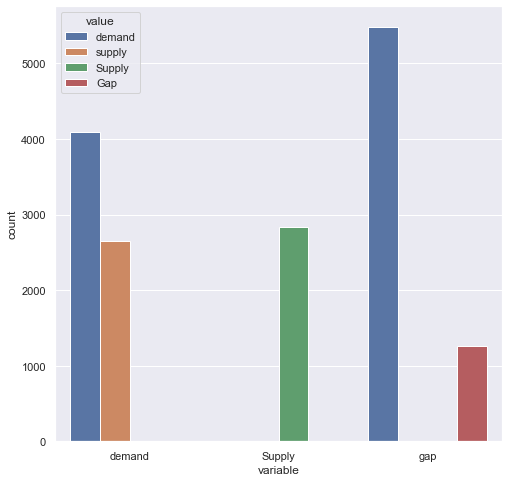

In [86]:
#plotting demand supply and gap count
plt.figure(num=None,figsize=(8,8),facecolor = 'w',edgecolor = 'k')
sns.countplot(x="variable",hue="value",data=pd.melt(uber_SupplyandDemand))
plt.show()